In [0]:
# 최신버전의 scipy는 toimage를 지원 하지 않아서 낮은 버전을 다운받는다.
!pip install scipy==1.1.0

# colab setting
from google.colab import drive
drive.mount('/content/gdrive')

import pandas as pd
import numpy as np
from matplotlib import pyplot
import scipy.misc 
from math import sqrt 
import itertools
from IPython.display import display
%matplotlib inline

# 데이터셋 로드.
data= pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/fer2013.csv')
data.head()

# matplotlib.pylab의 rcParams 설정을 활용하면, 
# 차트의 크기와 선의 색, 두께등의 기본 값을 설정할 수 있다.
# 그림(figure)의 크기. (가로,세로) 인치 단위
from pylab import rcParams
rcParams['figure.figsize'] = 15, 10

# 정답 out put 7열
num_classes = 7

# 이미지 크기 전역변수 저장
width = 48
height = 48

# 0:분노 / 1:싫음 / 2:공포 / 3:행복 / 4:슬픔 / 5:놀람 / 6:중립
emotion_labels = ["Angry", "Disgust", "Fear", "Happy", "Sad", "Surprise", "Neutral"]
classes=np.array(("Angry", "Disgust", "Fear", "Happy", "Sad", "Surprise", "Neutral"))
data.Usage.value_counts() 

###### 정답 데이터 시각화 ######
depth = 1
height = int(sqrt(len(data.pixels[0].split()))) 
width = int(height)
for i in range(0, 10): 
    array = np.mat(data.pixels[i]).reshape(height, width) 
    image = scipy.misc.toimage(array, cmin=0.0)
    display(image)
    print(emotion_labels[data.emotion[i]]) 

## Dataset Split ##
train_set = data[(data.Usage == 'Training')] 
X_train = np.array(list(map(str.split, train_set.pixels)), np.float32) 
X_train = X_train.reshape(X_train.shape[0], 48, 48, 1)

val_set = data[(data.Usage == 'PublicTest')]
X_val = np.array(list(map(str.split, val_set.pixels)), np.float32) 
X_val = X_val.reshape(X_val.shape[0], 48, 48, 1)

test_set = data[(data.Usage == 'PrivateTest')] 
X_test = np.array(list(map(str.split, test_set.pixels)), np.float32) 
X_test = X_test.reshape(X_test.shape[0], 48, 48, 1)

# train, validation, test set 데이터 갯수
# train = 28709개
# val = 3589개
# test = 3589개
# image shape = 48*48*1
num_train = X_train.shape[0]
num_val = X_val.shape[0]
num_test = X_test.shape[0]

### one - hot incoding ###
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator 
y_train = train_set.emotion 
y_train = np_utils.to_categorical(y_train, num_classes) 
y_val = val_set.emotion 
y_val = np_utils.to_categorical(y_val, num_classes) 
y_test = test_set.emotion 
y_test = np_utils.to_categorical(y_test, num_classes)

########### ImageDataGenerator를 이용해서 데이터를 부풀린다. ############
datagen = ImageDataGenerator( 
    rescale=1./255,
    rotation_range = 10,
    horizontal_flip = True,
    width_shift_range=0.1,
    height_shift_range=0.1,
    fill_mode = 'nearest')

testgen = ImageDataGenerator( 
    rescale=1./255
    )
datagen.fit(X_train)
batch_size = 64

### ImageDataGenerator
train_flow = datagen.flow(X_train, y_train, batch_size=batch_size) 
val_flow = testgen.flow(X_val, y_val, batch_size=batch_size) 
test_flow = testgen.flow(X_test, y_test, batch_size=batch_size)

Train on 22967 samples, validate on 5742 samples
Epoch 1/100
22967/22967 [==============================] - 3s 113us/sample - loss: 2.1640 - categorical_accuracy: 0.2080 - val_loss: 1.7890 - val_categorical_accuracy: 0.2914
Epoch 2/100
22967/22967 [==============================] - 2s 86us/sample - loss: 1.8344 - categorical_accuracy: 0.2824 - val_loss: 1.7361 - val_categorical_accuracy: 0.3149
Epoch 3/100
22967/22967 [==============================] - 2s 82us/sample - loss: 1.7376 - categorical_accuracy: 0.3130 - val_loss: 1.7251 - val_categorical_accuracy: 0.3191
Epoch 4/100
22967/22967 [==============================] - 2s 84us/sample - loss: 1.6903 - categorical_accuracy: 0.3316 - val_loss: 1.7254 - val_categorical_accuracy: 0.3009
Epoch 5/100
22967/22967 [==============================] - 2s 84us/sample - loss: 1.6699 - categorical_accuracy: 0.3356 - val_loss: 1.6713 - val_categorical_accuracy: 0.3471
Epoch 6/100
22967/22967 [==============================] - 2s 83us/sample - loss

NameError: ignored

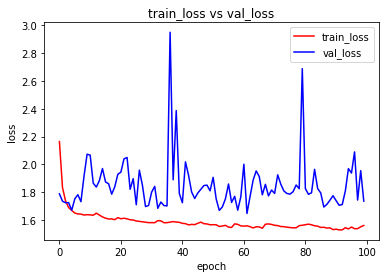

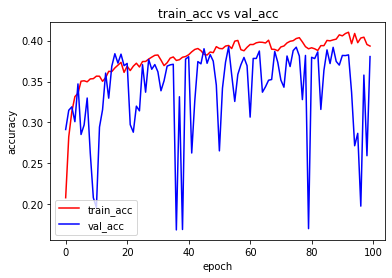

<Figure size 432x288 with 0 Axes>

In [0]:
import tensorflow
import kerastuner
from tensorflow.keras import datasets, Sequential, utils
from tensorflow.keras.layers import Flatten, Conv2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import models, layers, activations, initializers, losses, optimizers, metrics
import numpy as np
import matplotlib.pyplot as plt

X_train_r = X_train.reshape(28709,2304)

################ MODEL START ###################
model = models.Sequential() 
model.add(layers.Dense(input_dim=2304, units=768, activation='relu', kernel_initializer=initializers.he_uniform())) 
model.add(layers.BatchNormalization())
model.add(layers.Dropout(rate=0.3))

################ HIDDEN L1 ###################
model.add(layers.Dense(input_dim=768, units=256, activation='relu', kernel_initializer=initializers.he_uniform()))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(rate=0.3))

################ HIDDEN L2 ###################
model.add(layers.Dense(input_dim=256, units=64, activation='relu', kernel_initializer=initializers.he_uniform()))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(rate=0.3))

################ HIDDEN L3 ###################
model.add(layers.Dense(input_dim=64, units=32, activation='relu', kernel_initializer=initializers.he_uniform()))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(rate=0.3))

################ OUT PUT ###################
model.add(layers.Dense(units=7, activation='softmax')) # 0~9 

model.compile(optimizer=optimizers.Adam(), 
              loss=losses.categorical_crossentropy, 
              metrics=[metrics.categorical_accuracy])

# 하이퍼 파라미터
# batch_size=100 , epoch=100 , split=0.2, Dropout=0.3
# Hidden layer 3층. unit : 768 > 256 > 64 > 32
### model run ###
history = model.fit(X_train_r, y_train, batch_size=100, epochs=100, validation_split=0.2) 

%matplotlib inline
print(history.history.keys())
train_loss=history.history['loss']
val_loss=history.history['val_loss']
train_acc=history.history['categorical_accuracy']
val_acc=history.history['val_categorical_accuracy']

epochs = range(len(train_acc))

## ephoc 정확도 시각화 ##
plt.plot(epochs,train_loss,'r', label='train_loss')
plt.plot(epochs,val_loss,'b', label='val_loss')
plt.title('train_loss vs val_loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.figure()

plt.plot(epochs,train_acc,'r', label='train_acc')
plt.plot(epochs,val_acc,'b', label='val_acc')
plt.title('train_acc vs val_acc')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()
plt.figure()